# **I. Import all the necessary libraries**

In [1]:
from utils import *
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


# **II. Import and Preprocess the dataset**

In [2]:
data = pd.read_csv('Student_Performance.csv')


In [3]:
train, test = train_test_split(data)


In [4]:
x_test = test[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']]
y_test = test['Performance Index']


In [5]:
x_train = train[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']]
y_train = train['Performance Index']


In [6]:
data


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


Columns to normalize: All except for extracurricular activities

In [7]:
features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']


In [8]:
x_meta = [x_test,x_train]


In [9]:
exp = test['Extracurricular Activities']


In [ ]:
x_meta = [x_test,x_train]
y_meta = [y_test,y_train]
for i in features:
    for j in x_meta:
        if i == 'Extracurricular Activities':
            dict_map = {
                'Yes' : 1,
                'No' : 0,
            }
            j['Extracurricular Activities'] = j['Extracurricular Activities'].map(dict_map)
        else:
            j[i] = z_score_normalize(j[i])
del x_meta,y_meta


In [11]:
x_train


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
2824,0.125,0.644068,0,1.0,0.333333
4457,1.000,0.711864,0,0.2,0.888889
678,0.125,0.203390,0,0.2,0.555556
2038,0.000,0.050847,0,0.8,0.666667
6126,0.125,0.813559,0,0.2,0.222222
...,...,...,...,...,...
7915,0.000,0.237288,1,0.2,0.444444
7178,0.875,0.779661,0,0.0,0.444444
3602,0.750,0.254237,0,0.6,0.333333
8575,0.250,0.406780,0,1.0,1.000000


In [ ]:
y_train


# **III. Train the model**

In [13]:
model = LinearRegression()


In [ ]:
model.batch_gradient_descent_train(x_train,y_train,epochs=1000)


In [15]:
print(model.w,model.b)


[[21.08065545]
 [55.04874427]
 [ 0.2286725 ]
 [ 1.75491548]
 [ 1.2644674 ]] 15.766330719266337


In [23]:
print(model.predict(x_test.iloc[0].to_numpy()),y_test.iloc[0])


[[85.8864122]] 86.0


In [17]:
data.columns


Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [18]:
print(model.predict(x_test.iloc[4].to_numpy()),y_test.iloc[4])


[[48.3454532]] 46.0


In [19]:
prediction = []
for i in range(x_test.shape[0]):
    prediction.append(model.predict(x_test.iloc[i].to_numpy()))


In [ ]:
prediction


In [27]:
y_test


7754    86.0
8359    33.0
9194    46.0
5254    13.0
9468    46.0
        ... 
5383    72.0
5542    24.0
3956    47.0
5399    21.0
3751    69.0
Name: Performance Index, Length: 2500, dtype: float64

In [36]:
calculate_mae(prediction,y_test.to_numpy())


21.47130036812588

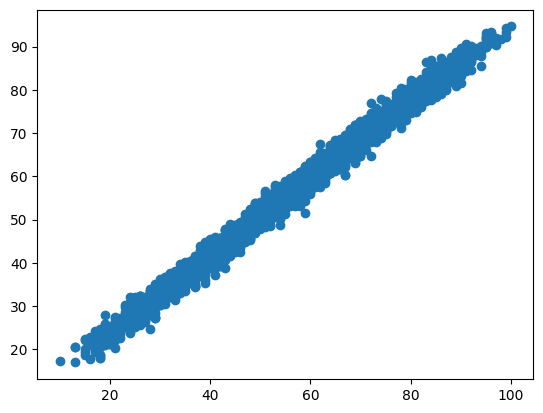

In [ ]:
plt.scatter(y_test,prediction)


The reason why the model performs bad might be that there is there is a feature that is categorical and not numerical. A Linear Regression model is not able to handle this feature very well.